In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB


seed=42

In [2]:
data = pd.read_csv("datass/dataset.csv")
# Rimuovi le righe in base alle condizioni specificate
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]

data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [3]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [4]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

In [6]:
clf = GaussianNB()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat = clf.predict(x_val_scaled)

accuracy = accuracy_score(y_val, y_hat)
confusion = confusion_matrix(y_val, y_hat)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.88
Confusion Matrix:
[[1463   54]
 [ 165  121]]


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
res = []

for var_smoothing in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    clf = GaussianNB(var_smoothing=var_smoothing)
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    clf.fit(x_train_scaled, y_train)

    x_val_scaled = scaler.transform(x_val)
    y_hat = clf.predict(x_val_scaled)

    accuracy = accuracy_score(y_val, y_hat)
    precision = precision_score(y_val, y_hat)
    recall = recall_score(y_val, y_hat)
    f1 = f1_score(y_val, y_hat)

    print(f'{var_smoothing=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
    res.append({
        'var_smoothing': var_smoothing,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

var_smoothing=0.001, accuracy=0.8790904048807543, precision=0.6954022988505747, recall=0.4230769230769231, f1=0.5260869565217391
var_smoothing=0.004641588833612777, accuracy=0.8790904048807543, precision=0.6976744186046512, recall=0.4195804195804196, f1=0.5240174672489084
var_smoothing=0.021544346900318832, accuracy=0.8796450360510261, precision=0.7090909090909091, recall=0.4090909090909091, f1=0.5188470066518848
var_smoothing=0.1, accuracy=0.8796450360510261, precision=0.7284768211920529, recall=0.38461538461538464, f1=0.5034324942791762
var_smoothing=0.46415888336127775, accuracy=0.8652246256239601, precision=0.8524590163934426, recall=0.18181818181818182, f1=0.2997118155619597
var_smoothing=2.154434690031882, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
var_smoothing=10.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
var_smoothing=46.41588833612773, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
var_smoothing=215.44346900318823, accur

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arra

In [8]:
res_df = pd.DataFrame(res)
sorted_df = res_df.sort_values('Recall', ascending=False)
sorted_df

,var_smoothing,Accuracy,Precision,Recall,F1-score
0,0.001000,0.879090,0.695402,0.423077,0.526087
1,0.004642,0.879090,0.697674,0.419580,0.524017
2,0.021544,0.879645,0.709091,0.409091,0.518847
3,0.100000,0.879645,0.728477,0.384615,0.503432
4,0.464159,0.865225,0.852459,0.181818,0.299712
5,2.154435,0.841375,0.000000,0.000000,0.000000
6,10.000000,0.841375,0.000000,0.000000,0.000000
7,46.415888,0.841375,0.000000,0.000000,0.000000
8,215.443469,0.841375,0.000000,0.000000,0.000000
9,1000.000000,0.841375,0.000000,0.000000,0.000000


In [9]:
res_df.iloc[res_df.Recall.argmax()]

var_smoothing    0.001000
Accuracy         0.879090
Precision        0.695402
Recall           0.423077
F1-score         0.526087
Name: 0, dtype: float64

In [10]:
var_smoothing = 0.001000

In [11]:
print(f'Naive Bayes,{var_smoothing=}')
clf = GaussianNB(var_smoothing=var_smoothing)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat_val = clf.predict(x_val_scaled)
accuracy_val = accuracy_score(y_val, y_hat_val)
precision_val = precision_score(y_val, y_hat_val)
recall = recall_score(y_val, y_hat_val)
print(f'VAL: {accuracy_val=}, {recall=}')


Naive Bayes,var_smoothing=0.001
VAL: accuracy_val=0.8790904048807543, recall=0.4230769230769231


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
confusion_val = confusion_matrix(y_val, y_hat_val)
print(confusion_val)

[[1464   53]
 [ 165  121]]


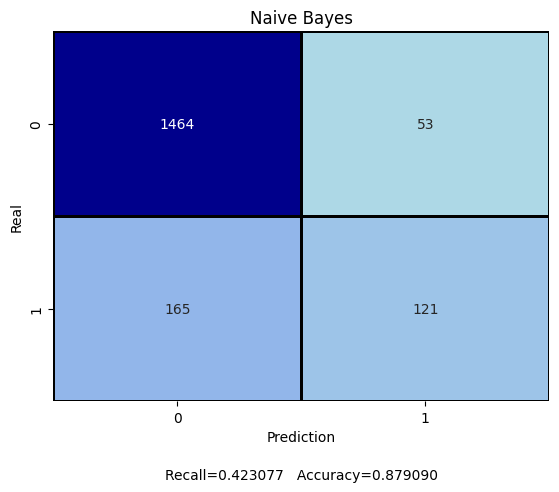

In [13]:
import matplotlib.colors as colors

# Definisci la tua colormap personalizzata con tonalità di blu
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['#ADD8E6', '#0000FF','#00008B'])

# Calcola la matrice di confusione
cm = confusion_matrix(y_val, y_hat_val)

# Crea la heatmap utilizzando la colormap personalizzata
sns.heatmap(cm, annot=True, fmt='.0f', cmap=custom_cmap, cbar=False, linecolor='Black', linewidths='1')

plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('Naive Bayes')
plt.text(0.5, -0.2, 'Recall=0.423077   Accuracy=0.879090', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

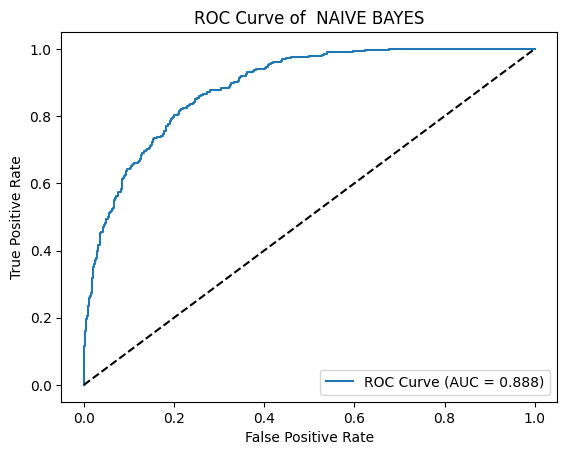

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_score = clf.predict_proba(x_val_scaled)
y_score = pd.DataFrame(y_score[:,1])
# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_score)

# Calcolo dell'area sotto la curva ROC (AUC)
auc = roc_auc_score(y_val, y_score)

# Plot della curva ROC
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of  NAIVE BAYES')
plt.legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


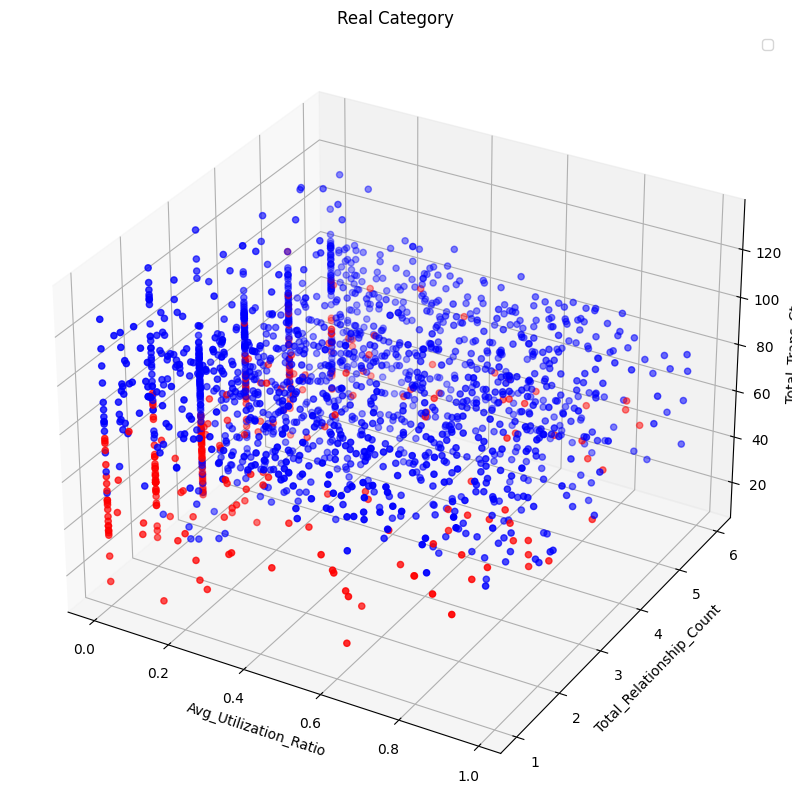

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Estrazione delle features
x1 = x_val['Avg_Utilization_Ratio']
x2 = x_val['Total_Relationship_Count']
x3 = x_val['Total_Trans_Ct']


# Tracciamento dei punti dei dati
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['blue', 'red'])

ax.scatter(x1, x2, x3, c=y_val, cmap=custom_cmap)

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.set_title('Real Category')
ax.legend()
# Visualizzazione del grafico
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11852\1486662478.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(True_Positive)[1]], x2[np.where(True_Positive)[1]], x3[np.where(True_Positive)[1]], c='red', cmap='cool', label='True Positive')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11852\1486662478.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(True_Negative)[1]], x2[np.where(True_Negative)[1]], x3[np.where(True_Negative)[1]], c='blue', cmap='cool', label='True Negative')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11852\1486662478.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(False_Positive)[1]], x2[np.where(False_Positive)[1]], x3[np.where(False_Positive)[1]], c='aqua', cmap='cool', label='False Positive')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11

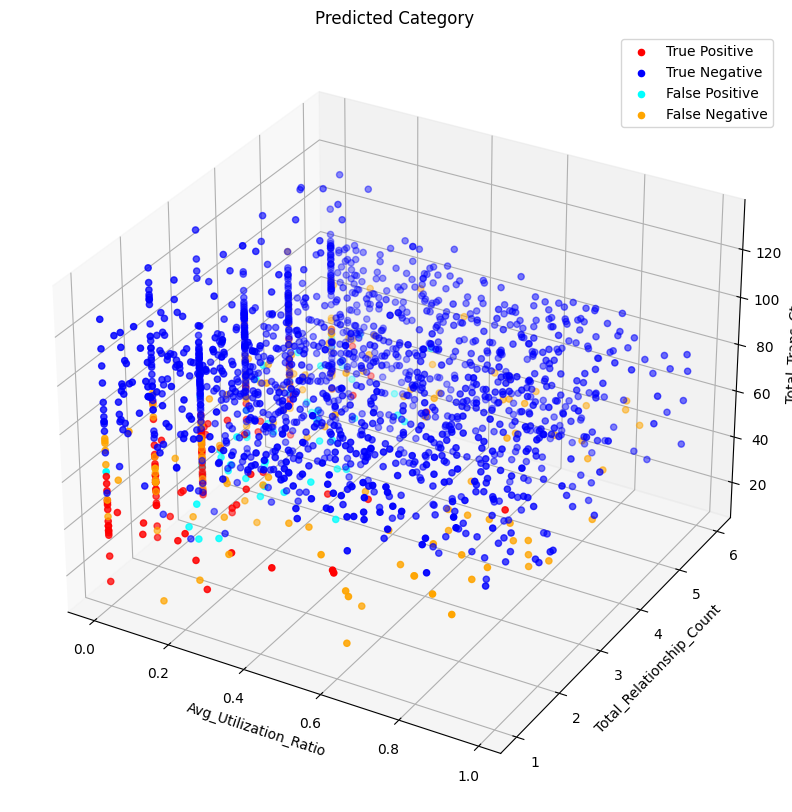

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(x_val['Avg_Utilization_Ratio'])
x2 = np.array(x_val['Total_Relationship_Count'])
x3 = np.array(x_val['Total_Trans_Ct'])
y_val_equals_1 = (np.array(y_val).transpose() == 1)
y_hat_equals_1 = (y_hat_val == 1)
y_val_equals_0 = (np.array(y_val).transpose() == 0)
y_hat_equals_0 = (y_hat_val == 0)
True_Positive = np.logical_and(y_val_equals_1, y_hat_equals_1)
True_Negative = np.logical_and(y_val_equals_0, y_hat_equals_0)
False_Positive = np.logical_and(y_val_equals_0, y_hat_equals_1)
False_Negative = np.logical_and(y_val_equals_1, y_hat_equals_0)

# Tracciamento dei punti dei dati con etichette reali
ax.scatter(x1[np.where(True_Positive)[1]], x2[np.where(True_Positive)[1]], x3[np.where(True_Positive)[1]], c='red', cmap='cool', label='True Positive')
ax.scatter(x1[np.where(True_Negative)[1]], x2[np.where(True_Negative)[1]], x3[np.where(True_Negative)[1]], c='blue', cmap='cool', label='True Negative')
ax.scatter(x1[np.where(False_Positive)[1]], x2[np.where(False_Positive)[1]], x3[np.where(False_Positive)[1]], c='aqua', cmap='cool', label='False Positive')
ax.scatter(x1[np.where(False_Negative)[1]], x2[np.where(False_Negative)[1]], x3[np.where(False_Negative)[1]], c='orange', cmap='cool', label='False Negative')

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.legend()
ax.set_title('Predicted Category')
# Visualizzazione del grafico
plt.show()